## Preparing Data for RNN

In [21]:
from pandas import read_csv
import numpy as np

In [22]:
df = read_csv('international-airline-passengers.csv', usecols=[1])
df.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [23]:
values = df.values.astype('float32')

In [24]:
values.shape

(144, 1)

In [25]:
train_size = int((values.shape[0] * 0.67))
test_size = values.shape[0] - train_size
train = values[0:train_size]
test = values[train_size:]

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
train = scaler.fit_transform(train)
test = scaler.fit_transform(test)

In [27]:
def create_dataset(data, k):
    dataX, dataY, = [],[]
    for i in range(data.shape[0] - k):
        x = data[i:i + k, 0]
        y = data[i + k, 0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

In [28]:
look_back = 12
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [29]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
trainX.shape

(84, 12, 1)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [32]:
model = Sequential()
model.add(SimpleRNN(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer= 'adam')
model.fit(trainX, trainY, epochs=10, batch_size=1)

Epoch 1/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1054
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0609
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0447
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0355
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0265
Epoch 6/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0203
Epoch 7/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0145
Epoch 8/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0129
Epoch 9/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0189
Epoch 10/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0136


In [44]:
testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict).ravel()

trainPredict = model.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict).ravel()

testTrue = scaler.inverse_transform([testY]).ravel()
trainTrue = scaler.inverse_transform([trainY]).ravel()

testPredict.shape, testTrue.shape


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


((36,), (36,))

In [45]:
import matplotlib.pyplot as plt

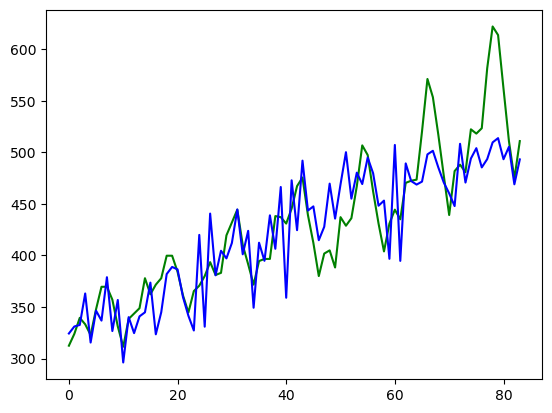

In [48]:
plt.plot(trainTrue, c= 'g')
plt.plot(trainPredict, c= 'b')

plt.show()

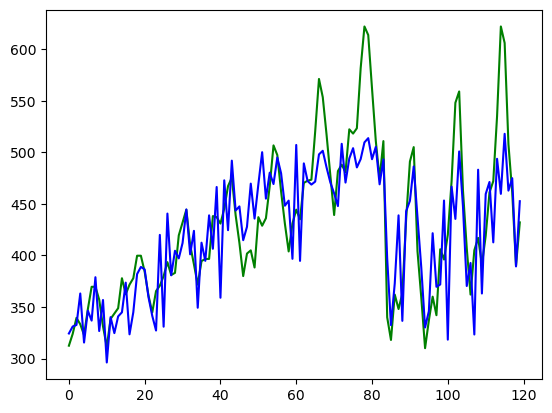

In [53]:
combinedPredicted = np.concatenate((trainPredict, testPredict))
combinedTrue = np.concatenate((trainTrue, testTrue))
plt.plot(combinedTrue, c= 'g')
plt.plot(combinedPredicted, c= 'b')

plt.show()